In [1]:
import pandas as pd
import numpy as np
import matplotlib as pl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
april=pd.read_csv('uber-raw-data-apr14.csv')
may=pd.read_csv('uber-raw-data-may14.csv')
june=pd.read_csv('uber-raw-data-jun14.csv')
july=pd.read_csv('uber-raw-data-jul14.csv')
august=pd.read_csv('uber-raw-data-aug14.csv')
september=pd.read_csv('uber-raw-data-sep14.csv')


In [3]:
data=pd.concat([april,may,june,july,august,september])
data.head(1000000)

,Date/Time,Lat,Lon,Base,Month
0,4/1/2014 0:11,40.7690,-73.9549,B02512,April
1,4/1/2014 0:17,40.7267,-74.0345,B02512,April
2,4/1/2014 0:21,40.7316,-73.9873,B02512,April
3,4/1/2014 0:28,40.7588,-73.9776,B02512,April
4,4/1/2014 0:33,40.7594,-73.9722,B02512,April
...,...,...,...,...,...
435479,5/2/2014 20:41,40.7087,-73.9589,B02682,May
435480,5/2/2014 20:41,40.7162,-74.0101,B02682,May
435481,5/2/2014 20:41,40.7343,-73.9925,B02682,May
435482,5/2/2014 20:41,40.7561,-73.9746,B02682,May


In [4]:
data.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
Month        0
dtype: int64

In [5]:
data.shape

(4534327, 5)

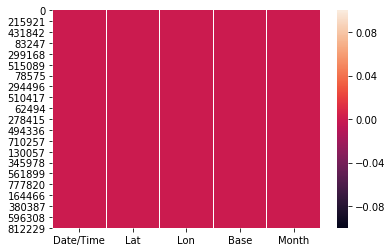

In [6]:
#Heatmap for NullValues

sns.heatmap(data.isnull())

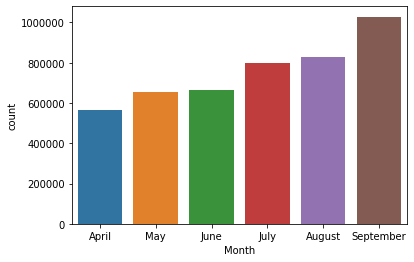

In [7]:
#CountPlot for TargetAttribute(Motor ON and OFF)

sns.countplot(data['Month'])

In [8]:
#Data Splitting

x=data.drop("Month",axis=1)
x.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11,40.7690,-73.9549,B02512
1,4/1/2014 0:17,40.7267,-74.0345,B02512
2,4/1/2014 0:21,40.7316,-73.9873,B02512
3,4/1/2014 0:28,40.7588,-73.9776,B02512
4,4/1/2014 0:33,40.7594,-73.9722,B02512


In [9]:
data.update(data['Month'].replace({'April': 1,'May':2,'June': 3,'July':4,'August': 5,'September':6}))
data.head()

,Date/Time,Lat,Lon,Base,Month
0,4/1/2014 0:11,40.7690,-73.9549,B02512,1
1,4/1/2014 0:17,40.7267,-74.0345,B02512,1
2,4/1/2014 0:21,40.7316,-73.9873,B02512,1
3,4/1/2014 0:28,40.7588,-73.9776,B02512,1
4,4/1/2014 0:33,40.7594,-73.9722,B02512,1


In [10]:
x=data.drop(['Date/Time','Month','Base'],axis=1)
x.head()

,Lat,Lon
0,40.7690,-73.9549
1,40.7267,-74.0345
2,40.7316,-73.9873
3,40.7588,-73.9776
4,40.7594,-73.9722


In [11]:
y=data[["Month"]]
y.head()

,Month
0,1
1,1
2,1
3,1
4,1


In [12]:
#TRAIN TEST DATA

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=5)

In [13]:
X_train.head()

,Lat,Lon
4739,40.7912,-73.9753
676964,40.6871,-73.9546
117982,40.7273,-73.9809
470469,40.6955,-74.1778
781373,40.7522,-73.9899


In [14]:
X_test.head()

,Lat,Lon
601284,40.7541,-73.9707
165631,40.7221,-73.9857
235260,40.7843,-73.9738
96244,40.7904,-73.9775
103149,40.7237,-73.9836


In [15]:
y_train.head()

,Month
4739,6
676964,4
117982,5
470469,3
781373,4


In [16]:
y_test.head()

,Month
601284,4
165631,4
235260,5
96244,2
103149,4


In [17]:
#Build the model

#1.Linear Regression()
#2.DecisionTreeRegressor()
#3.RandomForestRegressor()
#4.ScalarVectorMachine()
#5.NavieBayes()

In [18]:
#1.LinearRegression()

from sklearn.linear_model import LinearRegression
l=LinearRegression()
l.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
Lin=l.predict(X_test)
Lin

array([[3.82197398],
       [3.82613993],
       [3.80051289],
       ...,
       [3.85466839],
       [3.79611997],
       [3.81303622]])

In [20]:
y_test

,Month
601284,4
165631,4
235260,5
96244,2
103149,4
...,...
380572,6
729961,4
800043,5
416227,6


In [21]:
#2.DecisionTreeRegressor()

from sklearn.tree import DecisionTreeRegressor
d=DecisionTreeRegressor()
d.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [22]:
Dec_tree=d.predict(X_test)
Dec_tree

array([5.5       , 3.09090909, 3.25      , ..., 4.23076923, 3.44444444,
       4.8       ])

In [23]:
y_test

,Month
601284,4
165631,4
235260,5
96244,2
103149,4
...,...
380572,6
729961,4
800043,5
416227,6


In [24]:
# Random forest

from sklearn.ensemble import RandomForestRegressor
r=RandomForestRegressor()
r.fit(X_train,y_train)

C:\Users\pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [25]:
Random_for=r.predict(X_test)
Random_for

array([5.265     , 2.91060897, 3.21435974, ..., 3.95321545, 3.57301948,
       4.8775247 ])

In [26]:
y_test

,Month
601284,4
165631,4
235260,5
96244,2
103149,4
...,...
380572,6
729961,4
800043,5
416227,6


In [27]:
#Finding whiuch is the Best model by comparing the mean square erro

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score

In [28]:
print("Mean Square error: ")
print("1.Linear Regression           :",mean_squared_error(Lin,y_test))
print("2.Decision Tree Regression    :",mean_squared_error(Dec_tree,y_test))
print("3.Random Forest Regressor     :",mean_squared_error(Random_for,y_test))



Mean Square error: 
1.Linear Regression           : 2.895833986809929
2.Decision Tree Regression    : 3.143987820684744
3.Random Forest Regressor     : 3.0101558069077683


In [29]:
print("R2_Score: ")
print("1.Linear Regression           :",r2_score(Lin,y_test))
print("2.Decision Tree Regression    :",r2_score(Dec_tree,y_test))
print("3.Random Forest Regressor     :",r2_score(Random_for,y_test))


R2_Score: 
1.Linear Regression           : -742.8771838776281
2.Decision Tree Regression    : -3.7929186097457848
3.Random Forest Regressor     : -4.895354319399451
